### **Bu Projede;**
CIFAR-10 veri kümesini kullanarak veri artırma örneklerini oluşturup görselleştiricez. CIFAR-10, 10 farklı sınıfa ait 60.000 renkli görüntüden oluşan bir veri kümesidir. Her sınıf için 6.000 görüntü bulunmaktadır ve 32x32 piksel boyutunda renkli görüntüler içerir. CIFAR-10 veri kümesini yüklemek için keras kütüphanesinden import ettik. veri kümesini import etmek, bu veri kümesinin bilgisayarımıza yüklenmesi anlamına gelmez. CIFAR-10 veri kümesini internet üzerinden indirir ve doğrudan belleğe yükler. Bu nedenle, bu fonksiyonu çağırdığımızda, CIFAR-10 veri kümesi geçici olarak belleğe yüklenir.

CIFAR-10 veri kümesinden yüklenen görüntüler üzerinde veri artırma işlemleri yapmak için ImageDataGenerator sınıfını kullanıp sonrasında, veri artırma işlemi uygulanmış görüntüleri görselleştirmek için matplotlib kullanacağız.

In [2]:
from google.colab import drive  # BURDAKİ KODLAR DRİVER'I COLABA BAĞLAR YOKSA DOSYAYI ALGILAYAMAZ
drive.mount('/content/drive')

# Sürücü ismini alma
drive_name = '/content/drive'

import os
os.chdir(drive_name)

Mounted at /content/drive


In [ ]:
!ls

MyDrive


In [ ]:
!ls MyDrive

'Adsız doküman.gdoc'  'Colab Notebooks'    Example001	    'Untitled (1)'
 AI_Project	       CredictCard.ipynb   Untitled	    'Untitled (2)'
 AI_Project02	       CredictCart	   Untitled0.ipynb


In [ ]:
import os
os.chdir("MyDrive/AI_Project02")

In [ ]:
!ls

veri_arttirma2.ipynb


In [3]:
"""### CIFAR 10 veri kümesi ile veri artırma örnekleri ve görselleştirme"""

from keras.datasets import cifar10                            # Cifar10 veri setini aldık
from keras.preprocessing.image import ImageDataGenerator      # Görüntü veri artırma işlemleri
from matplotlib import pyplot                                 # Görüntüleri görselleştirmek
from keras import backend as K                                # keras kütüphanesinden backend modülünü içeri aktarır ve K olarak isimlendirir. Bu, keras'ın arkasında yatan alt sistemlere erişmek için
import numpy as np                                            # dizilerle çalışmak

In [4]:
# Veriyi indirme ve eğitim test kümelerini rastgele oluşturma

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

170498071/170498071 [==============================] - 3s 0us/step


- `(X_train, y_train), (X_test, y_test) = cifar10.load_data()`  CIFAR-10 veri kümesini yükler ve eğitim ve test kümelerini (X_train, y_train) ve (X_test, y_test) olarak iki ayrı demet içinde depolar. `load_data()` fonksiyonu, Keras kütüphanesinin datasets modülünde bulunan bir fonksiyondur.

- `X_train = X_train.astype('float32') ve X_test = X_test.astype('float32')` Görüntü verilerini, yani X_train ve X_test dizilerini float32 veri türüne dönüştürür. Bu, daha sonra normalleştirme işlemi yapılırken veri kaybını önlemek için yapılır. `astype()` fonksiyonu, bir NumPy dizisinin veri türünü değiştirmek için kullanılır.

- `X_train /= 255` ifadesindeki `/ operatörü`, her bir elemanı belirli bir değere bölen bir atama operatörüdür. Bu ifade, her bir X_train elemanını 255'e böler ve sonucu X_train dizisine atar. Bu operatör, `normalleştirme` işlemi için kullanılır. CIFAR-10 veri kümesindeki görüntülerin piksel değerleri 0 ile 255 arasında olduğu için, bu değerleri [0, 1] aralığına dönüştürmek amacıyla her piksel değerini 255'e böleriz. Böylece, her piksel değeri [0, 1] aralığında olacak şekilde normalleştirilmiş olur.

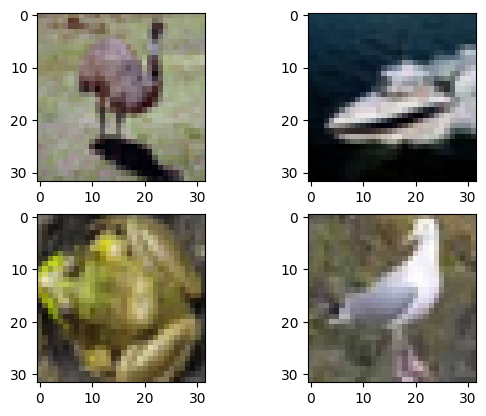

In [5]:
"""veri artırma işlemini gerçekleştirmeden önce CIFAR-10 veri kümesindeki orijinal görüntüleri görselleştir"""

"""# Orijinal Görüntüler"""

datagen = ImageDataGenerator()
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break


- `datagen = ImageDataGenerator()` ***ImageDataGenerator*** sınıfından bir nesne oluşturulur. Bu nesne, veri artırma işlemlerini gerçekleştirmek için kullanılacaktır. Ancak bu aşamada herhangi bir veri artırma işlemi uygulanmaz, yalnızca orijinal görüntülerin görselleştirilmesi için kullanılır.

- `fit()` fonksiyonu, veri artırma işlemlerinin parametrelerini(örneğin, döndürme, kaydırma, ölçekleme vb.) hesaplamak ve ayarlamak için kullanılır.

- `flow()` fonksiyonu, ImageDataGenerator sınıfının bir yöntemidir ve veri artırma için kullanılır. Bu yöntem, veri artırılmış veri yığınları oluşturmak için veri akışı (data flow) sağlar.

- `batch_size`, bir makine öğrenimi modelinin eğitim sırasında her bir adımda işleyeceği örnek sayısını belirten bir parametredir. Büyük veri kümeleriyle çalışırken, tüm veriyi aynı anda işlemek hem bellek kullanımını artırabilir hem de işlem hızını düşürebilir. Bu nedenle, eğitim sırasında veri kümesini daha küçük yığınlar halinde (batch) işlemek yaygın bir uygulamadır. Örneğin, 1000 görüntüden oluşan bir eğitim veri kümeniz varsa ve batch_size parametresini 32 olarak ayarlarsanız, model her eğitim adımında 32 görüntüyü işleyecektir. Bu, eğitim verisi kümesini 32'lik yığınlar halinde işleyerek modelin daha verimli bir şekilde öğrenmesini sağlar.

- `seed parametresi`, rastgele sayı üretiminde kullanılan başlangıç değerini belirtir. Rastgele sayılar genellikle bir başlangıç noktasından (seed) başlayarak belirli bir algoritma kullanılarak üretilirler. Aynı başlangıç değeri (seed) kullanılarak her zaman aynı rastgele sayılar üretilebilir. Bu, tekrarlanabilirlik (reproducibility) sağlar; yani, aynı kodu çalıştırdığınızda her seferinde aynı sonuçları elde edebilirsiniz.

- `for i in range(0,4):` Bu satır, iç içe bir döngü başlatır ve her bir veri yığınındaki dört örneği işlemek için kullanılır.

- `pyplot.subplot(220 +1 +i)` Matplotlib kütüphanesindeki pyplot modülünden gelen subplot() fonksiyonu bir alt grafik oluşturur. Alt grafikler, birden fazla grafik veya resmi tek bir figür içinde düzenlemek için kullanılır. Genek kullanım şekli--> `pyplot.subplot(nrows, ncols, index)` `nrows`: Oluşturulacak alt grafiklerin toplam satır sayısını belirtir. `ncols`: Oluşturulacak alt grafiklerin toplam sütun sayısını belirtir. `index`: Oluşturulacak alt grafiklerin konumunu belirtir.

- `pyplot.imshow(X_batch[i])` Bu satır, X_batch içindeki i indeksine sahip olan görüntüyü görselleştirir.

- `pyplot.show()` Bu satır, her bir yığında bulunan dört örneğin gösterimini ekranda gösterir.

- `break:` Bu satır, sadece bir yığının işlenmesini sağlar. Bu, kodun sadece birkaç örnek görüntüyü göstermesini ve ardından döngünün sona ermesini sağlar.


# DÖNDÜRME

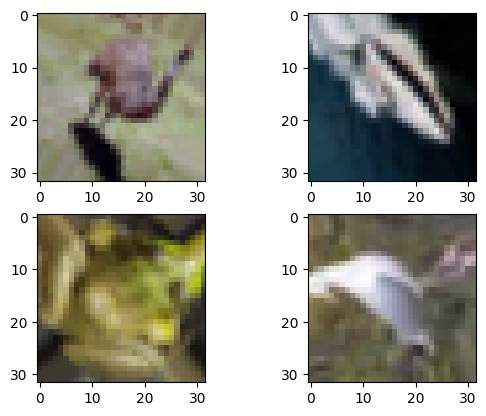

In [6]:
"""# DÖNDÜRME"""

datagen = ImageDataGenerator(rotation_range=359)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break


`rotation_range` parametresi kullanılarak döndürme aralığı belirlenir. rotation_range=359, rastgele döndürme açısının 0 ile 359 derece arasında olabileceğini belirtir. Bu, neredeyse tüm olası dönüş açılarını içeren geniş bir aralık anlamına gelir.

# DİKEYDE KAYDIRMA

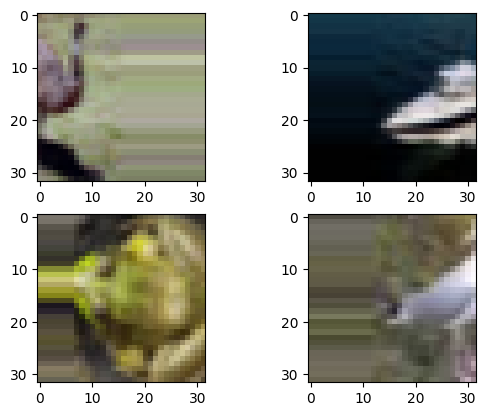

In [7]:
"""# DİKEYDE KAYDIRMA"""

datagen = ImageDataGenerator(height_shift_range=0.5)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

` height_shift_range=0.5` Görüntülerin dikeyde rastgele kaydırılabileceği maksimum oranı belirtir. Bu değer, görüntünün yüksekliğinin yarısına kadar (0.5) olan bir kaydırma miktarını ifade eder.

# YATAYDA SİMETRİĞİNİ ALMA

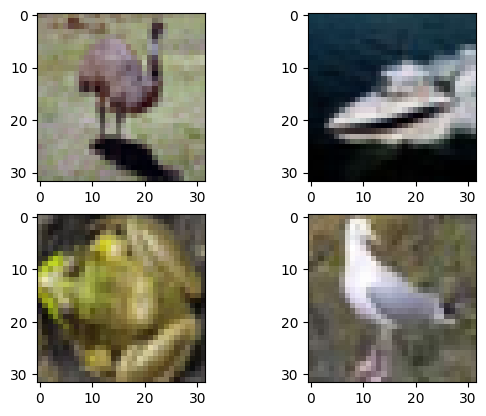

In [8]:
"""# YATAYDA SİMETRİĞİNİ ALMA"""

datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=499):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

`horizontal_flip=True` parametresi, veri artırma işlemi sırasında görüntülerin yatay olarak simetrik bir şekilde çevrilmesini (yatay yansıtılmasını) sağlar.